In [23]:
import pandas as pd
from scipy.stats import fisher_exact
import joblib
import os

import matplotlib.pyplot as plt

In [2]:
cwd = os.getcwd()
parent_dir = os.path.dirname(cwd)
grandparent_dir = os.path.dirname(parent_dir)

In [3]:
#Load in the dataframe containing all model predictions on the FEMH test set
prediction_df = pd.read_csv(f'{grandparent_dir}/Predict Audio/FEMH_ModelPredictions.csv', index_col=0)
print(prediction_df.shape)
prediction_df.head()

(660, 74)


,file,ground truth,LR_FeatureStates_Age_Sex prediction,LR_FeatureStates_Age_Sex probability,LR_FeatureStates_Age_Sex_Symptoms prediction,LR_FeatureStates_Age_Sex_Symptoms probability,LR_FeatureStates_Rec_Only prediction,LR_FeatureStates_Rec_Only probability,LR_FeatureStates_Symptoms prediction,LR_FeatureStates_Symptoms probability,...,SVM_MFCC_Symptoms prediction,SVM_MFCC_Symptoms probability,SVM_OpenSmile_Age_Sex prediction,SVM_OpenSmile_Age_Sex probability,SVM_OpenSmile_Age_Sex_Symptoms prediction,SVM_OpenSmile_Age_Sex_Symptoms probability,SVM_OpenSmile_Rec_Only prediction,SVM_OpenSmile_Rec_Only probability,SVM_OpenSmile_Symptoms prediction,SVM_OpenSmile_Symptoms probability
0,Atrophy-0001apo,Benign,Benign,0.001301,Benign,0.157229,Benign,0.000026,Benign,0.221742,...,Benign,0.008403,Benign,0.010395,Benign,0.017766,Benign,0.019887,Benign,0.025877
1,Atrophy-0400og6,Benign,Benign,0.002063,Benign,0.213735,Benign,0.000276,Benign,0.451704,...,Malignant,0.055249,Benign,0.008386,Benign,0.015901,Benign,0.014908,Benign,0.026531
2,Atrophy-0500cg6,Benign,Benign,0.070688,Malignant,0.711418,Benign,0.044419,Malignant,0.573204,...,Malignant,0.131172,Malignant,0.123806,Malignant,0.083921,Malignant,0.047273,Malignant,0.079512
3,Atrophy-0601ntf,Benign,Malignant,0.961759,Malignant,0.625363,Malignant,0.926107,Malignant,0.625380,...,Benign,0.022580,Benign,0.035384,Benign,0.018849,Benign,0.024361,Benign,0.039769
4,Atrophy-07017ip,Benign,Benign,0.000648,Benign,0.124255,Benign,0.000029,Benign,0.321406,...,Benign,0.014545,Benign,0.011126,Malignant,0.042882,Benign,0.025011,Malignant,0.060018


In [14]:
demographics = pd.read_pickle(f'{grandparent_dir}/Audio demographics/FEMH_demographics.pkl')[['filename', 'Age', 'Sex']]
demographics.head()

,filename,Age,Sex
0,Atrophy-00002mg,97,1
1,Atrophy-0001297,86,1
2,Atrophy-0001apo,45,2
3,Atrophy-0001qd3,75,1
4,Atrophy-0002ipt,64,1


In [16]:
prediction_df=pd.merge(left=prediction_df, right=demographics, left_on='file', right_on='filename')

In [20]:
prediction_df.head()

,file,ground truth,LR_FeatureStates_Age_Sex prediction,LR_FeatureStates_Age_Sex probability,LR_FeatureStates_Age_Sex_Symptoms prediction,LR_FeatureStates_Age_Sex_Symptoms probability,LR_FeatureStates_Rec_Only prediction,LR_FeatureStates_Rec_Only probability,LR_FeatureStates_Symptoms prediction,LR_FeatureStates_Symptoms probability,...,SVM_OpenSmile_Age_Sex probability,SVM_OpenSmile_Age_Sex_Symptoms prediction,SVM_OpenSmile_Age_Sex_Symptoms probability,SVM_OpenSmile_Rec_Only prediction,SVM_OpenSmile_Rec_Only probability,SVM_OpenSmile_Symptoms prediction,SVM_OpenSmile_Symptoms probability,filename,Age,Sex
0,Atrophy-0001apo,Benign,Benign,0.001301,Benign,0.157229,Benign,0.000026,Benign,0.221742,...,0.010395,Benign,0.017766,Benign,0.019887,Benign,0.025877,Atrophy-0001apo,45,2
1,Atrophy-0400og6,Benign,Benign,0.002063,Benign,0.213735,Benign,0.000276,Benign,0.451704,...,0.008386,Benign,0.015901,Benign,0.014908,Benign,0.026531,Atrophy-0400og6,60,2
2,Atrophy-0500cg6,Benign,Benign,0.070688,Malignant,0.711418,Benign,0.044419,Malignant,0.573204,...,0.123806,Malignant,0.083921,Malignant,0.047273,Malignant,0.079512,Atrophy-0500cg6,75,1
3,Atrophy-0601ntf,Benign,Malignant,0.961759,Malignant,0.625363,Malignant,0.926107,Malignant,0.625380,...,0.035384,Benign,0.018849,Benign,0.024361,Benign,0.039769,Atrophy-0601ntf,76,1
4,Atrophy-07017ip,Benign,Benign,0.000648,Benign,0.124255,Benign,0.000029,Benign,0.321406,...,0.011126,Malignant,0.042882,Benign,0.025011,Malignant,0.060018,Atrophy-07017ip,44,2


In [17]:
prediction_columns=[s for s in list(prediction_df.columns) if "prediction" in s]

In [26]:
prediction_df[prediction_columns] = prediction_df[prediction_columns].apply(lambda x: x == prediction_df['ground truth'])

# Fisher Exact for Gender

In [27]:
fisher_exact_results = pd.DataFrame(columns=['Model', 'P Value'])

In [28]:
for col in prediction_columns:
    model=col.split(' ')[0]
    p_value = fisher_exact(pd.crosstab(prediction_df['Sex'], prediction_df[col])).pvalue
    fisher_exact_results.loc[len(fisher_exact_results)] = [model, p_value]

In [29]:
fisher_exact_results

,Model,P Value
0,LR_FeatureStates_Age_Sex,6.392876e-25
1,LR_FeatureStates_Age_Sex_Symptoms,4.511262e-46
2,LR_FeatureStates_Rec_Only,1.126627e-22
3,LR_FeatureStates_Symptoms,3.128154e-24
4,LR_MFCC_Age_Sex,3.192880e-56
5,LR_MFCC_Age_Sex_Symptoms,5.522908e-40
6,LR_MFCC_Rec_Only,1.057013e-13
7,LR_MFCC_Symptoms,1.448429e-25
8,LR_OpenSmile_Age_Sex,6.719154e-83
9,LR_OpenSmile_Age_Sex_Symptoms,2.370321e-37


## Graphing

In [35]:
algorithm_map = {'LR':'Logistic Regression',
                'MLP': 'MLP',
                'SVM': 'SVM'}
input_map = {'Rec_Only':'Voice',
            'Age_Sex': 'Voice + Demographics',
            'Symptoms': 'Voice + Symptoms',
            'Age_Sex_Symptoms': 'Voice + Demographics + Symptoms'}

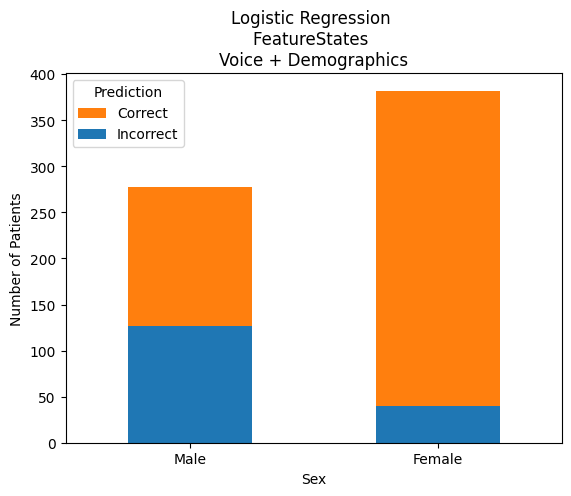

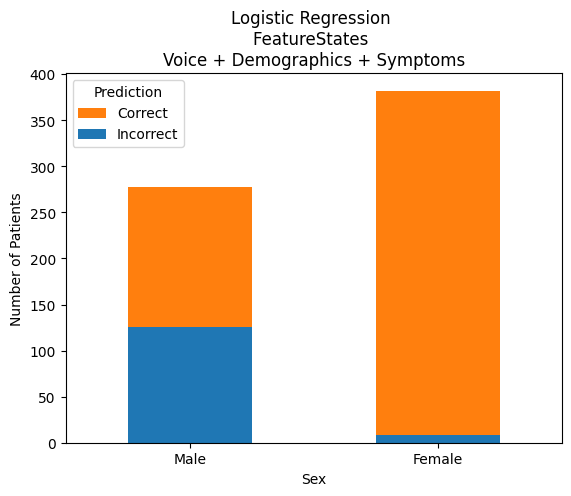

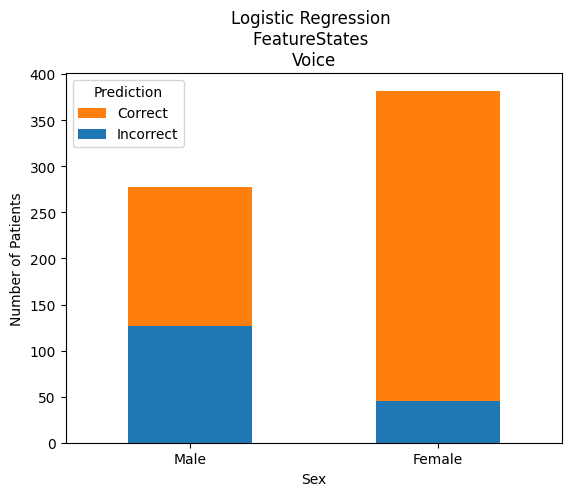

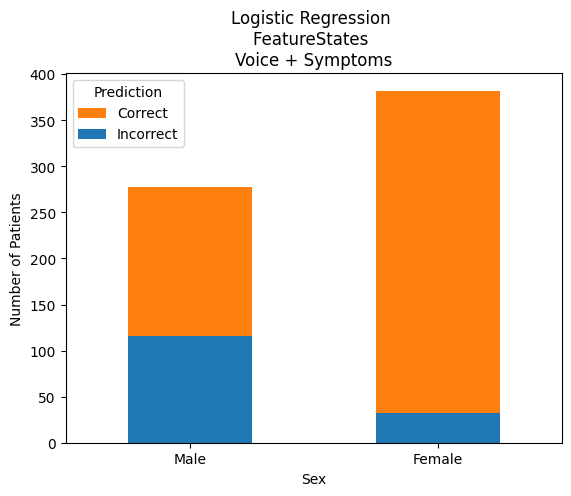

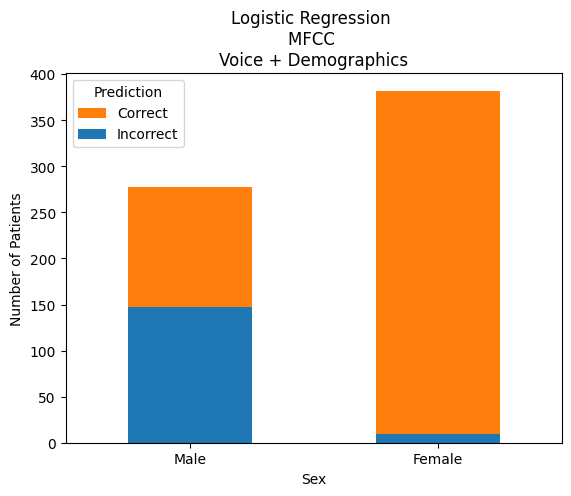

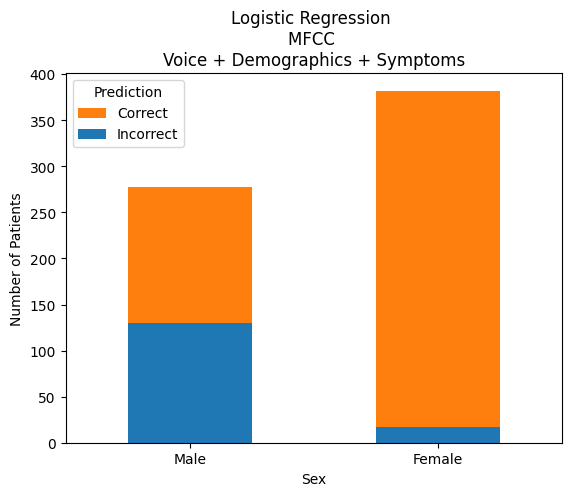

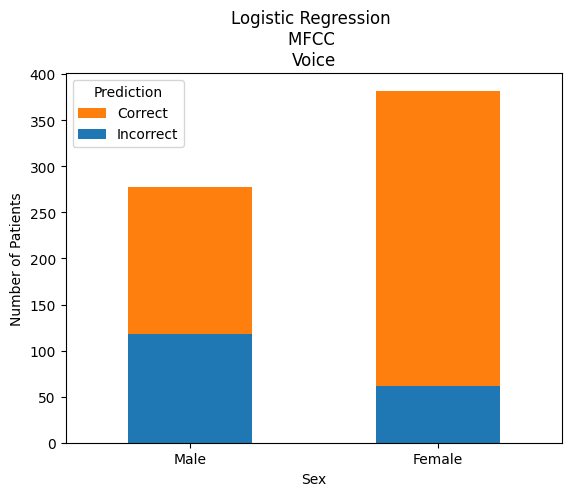

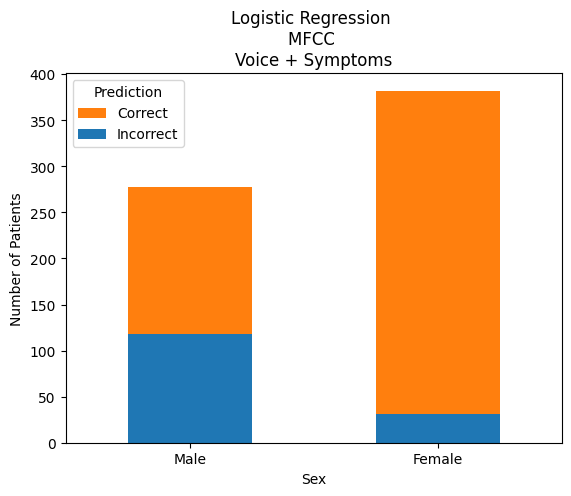

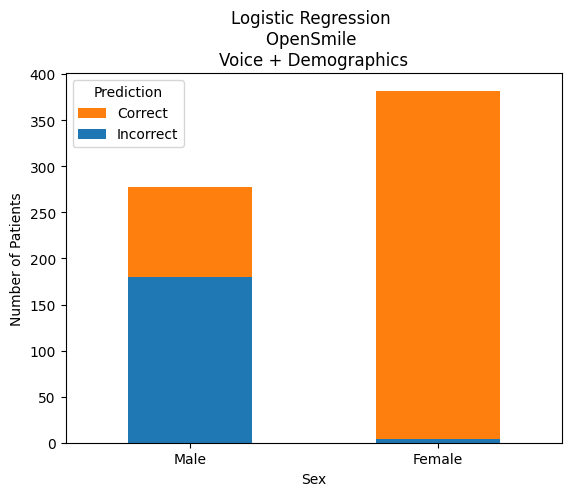

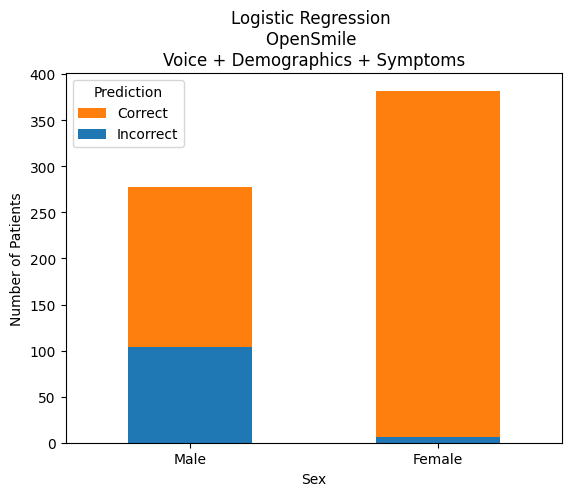

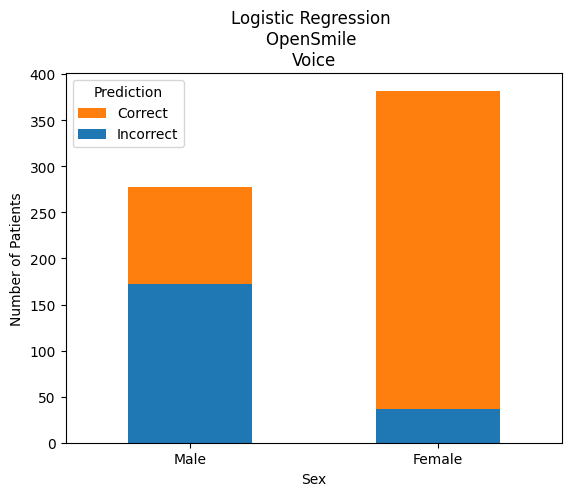

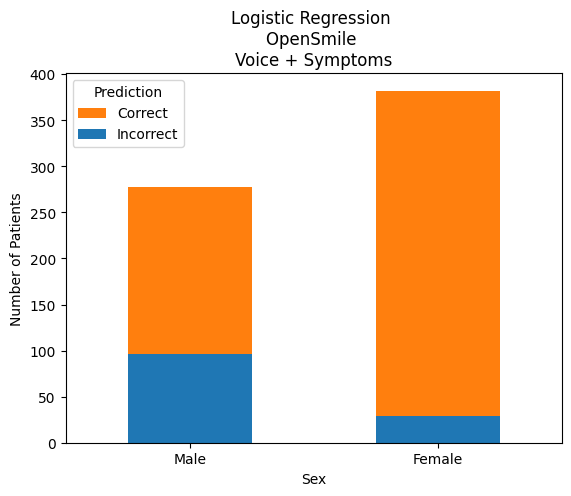

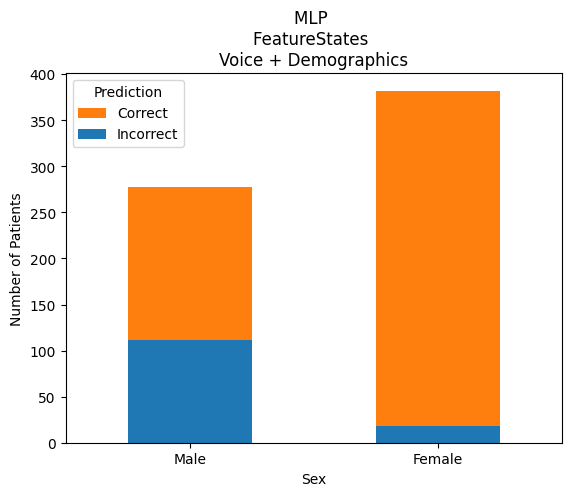

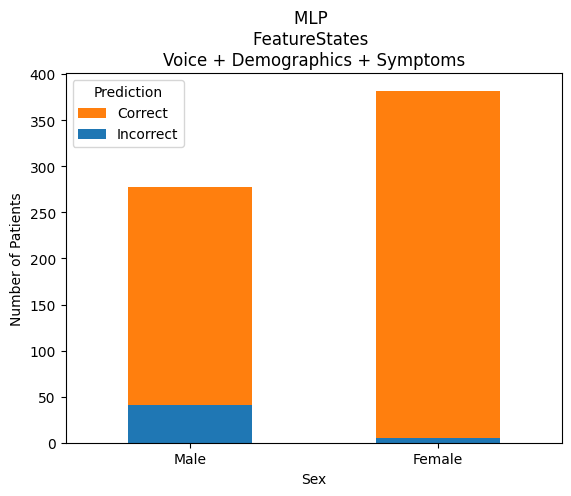

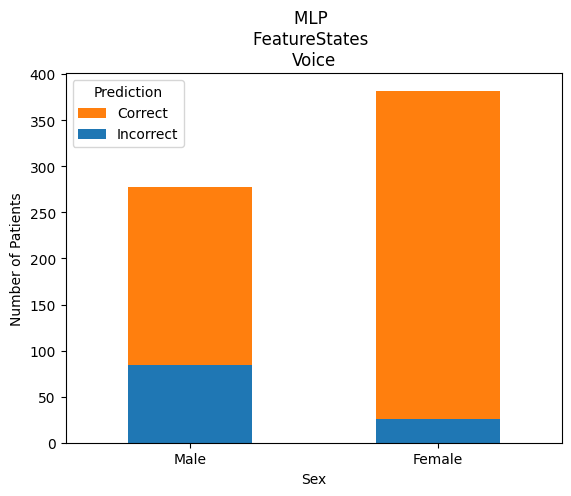

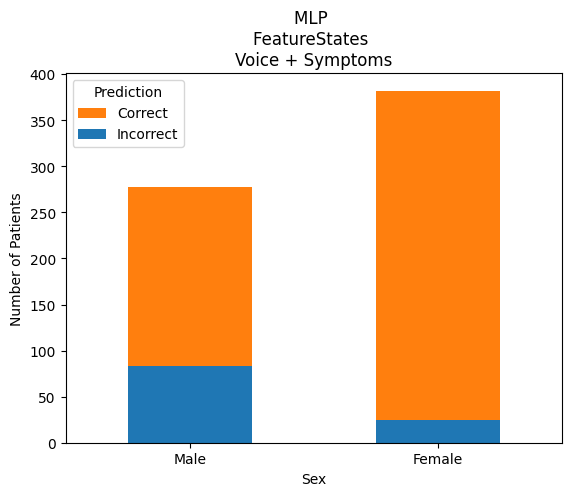

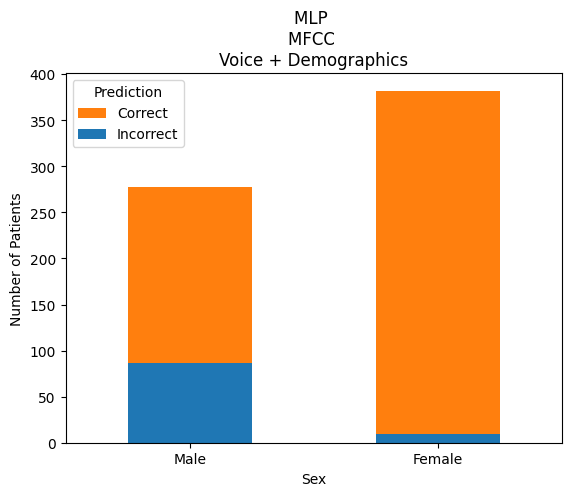

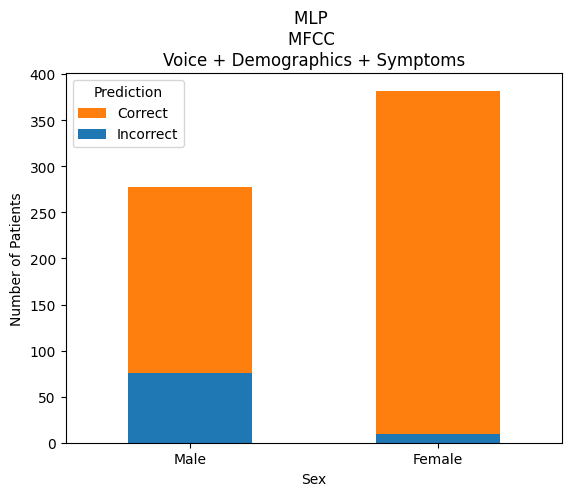

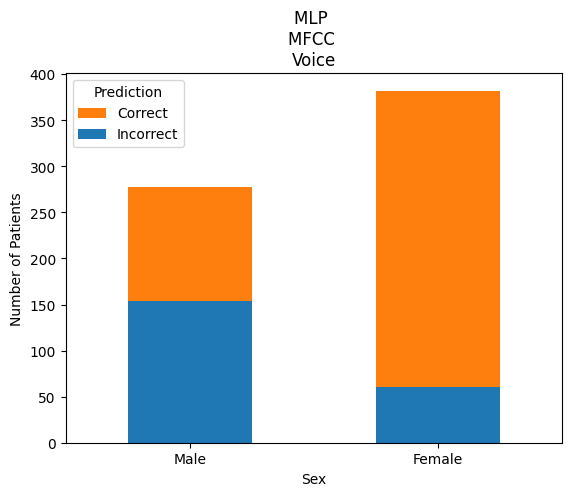

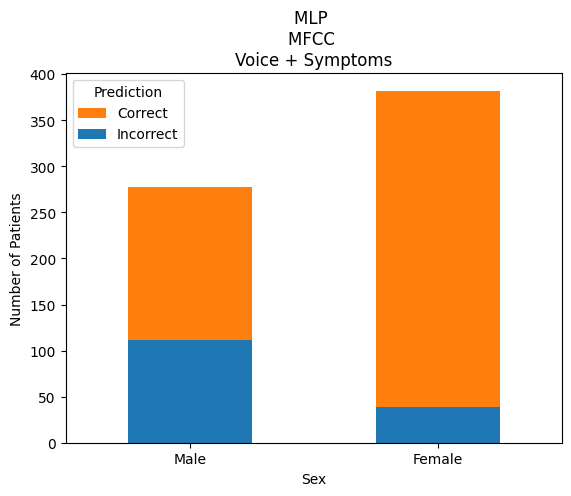

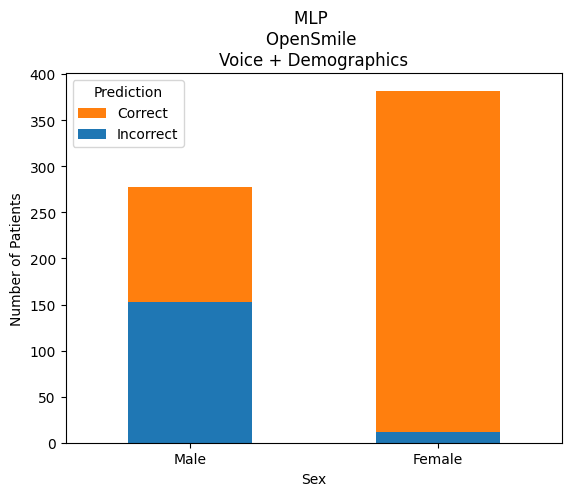

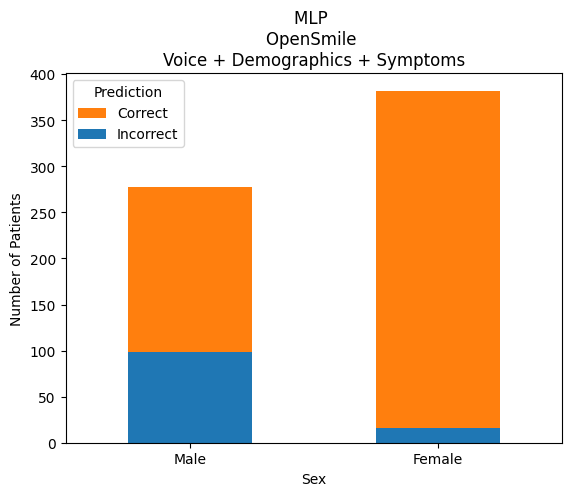

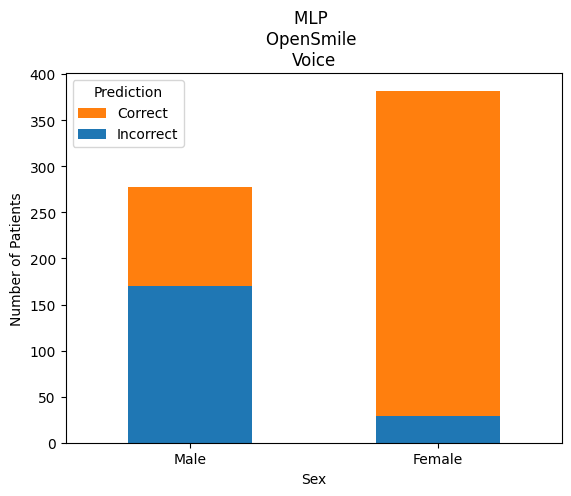

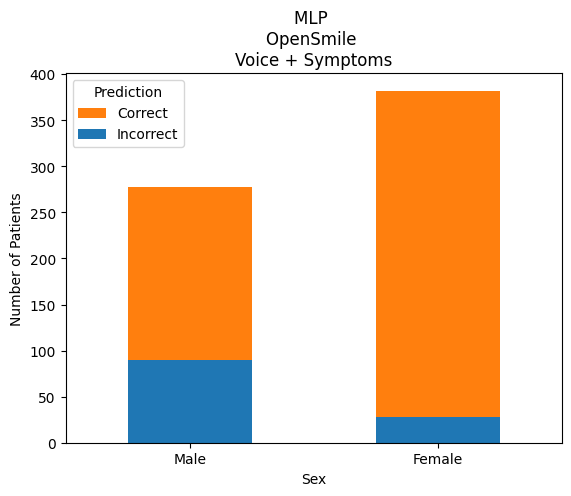

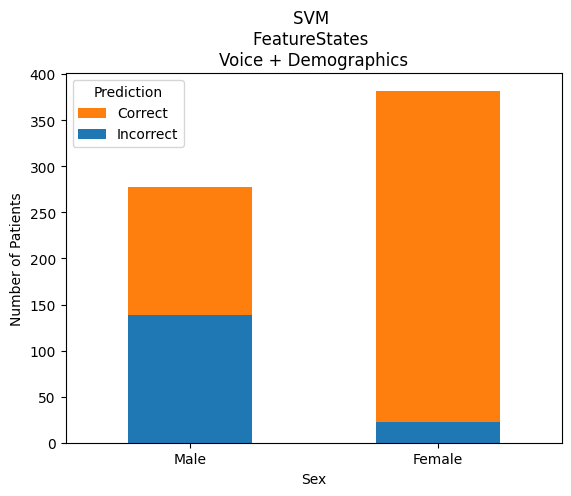

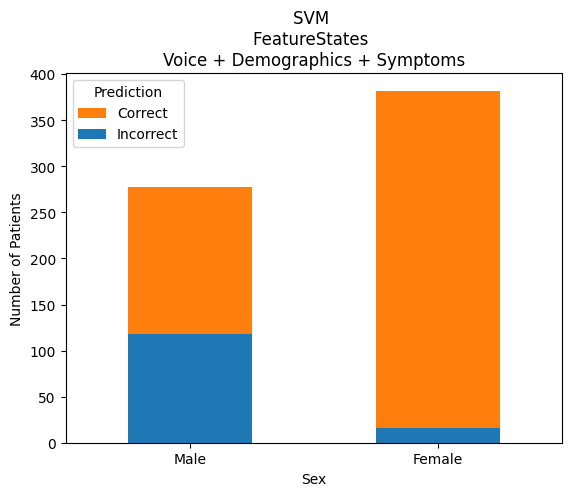

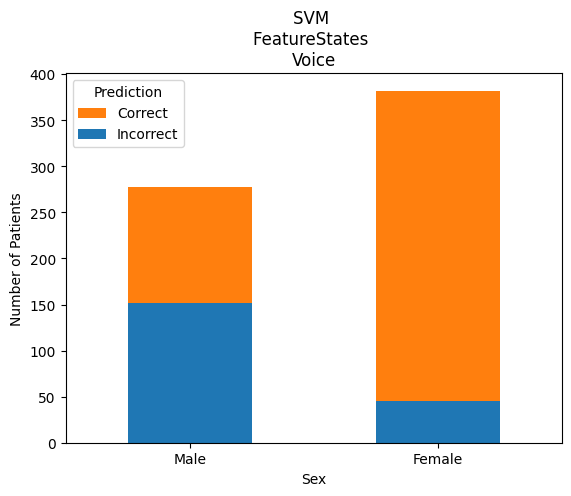

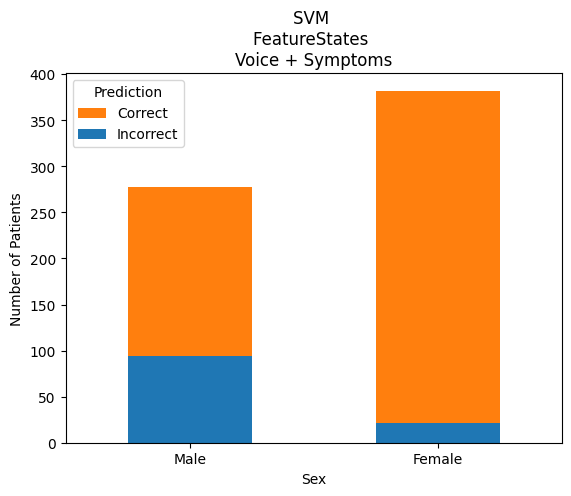

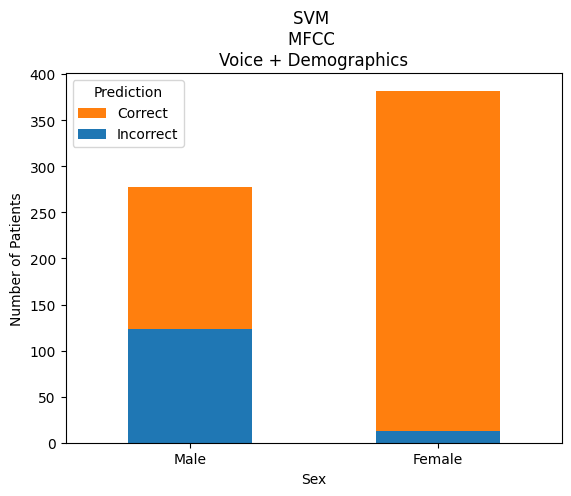

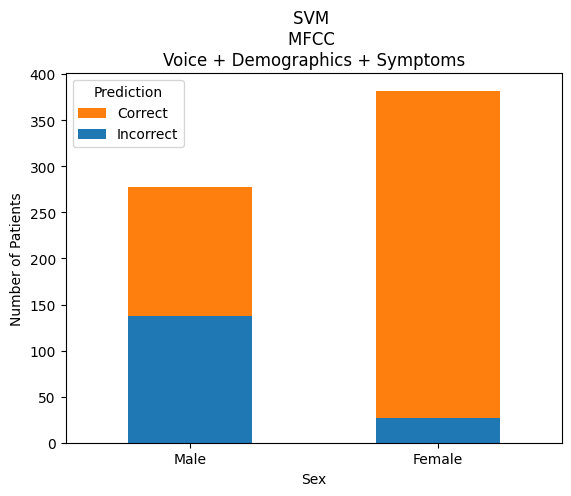

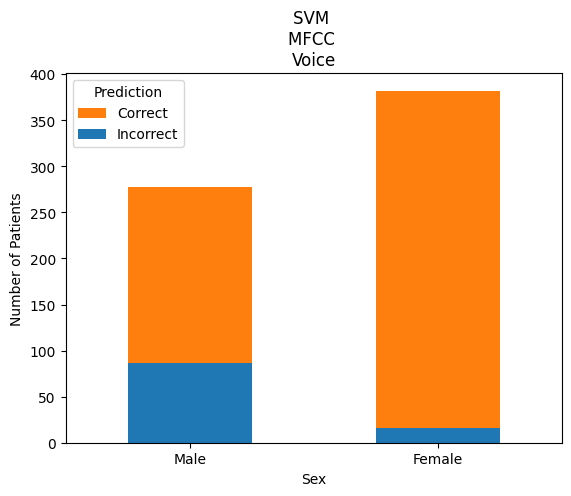

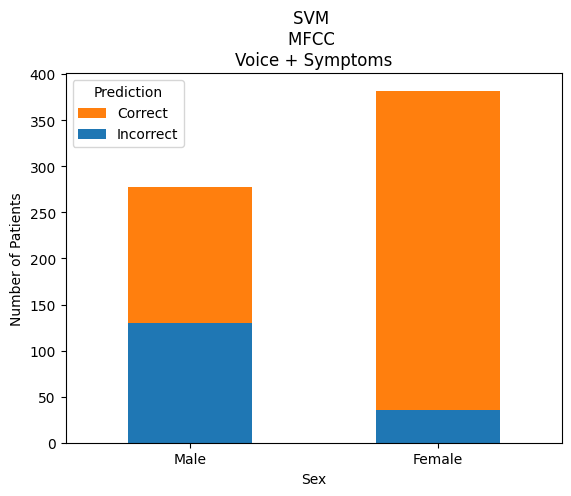

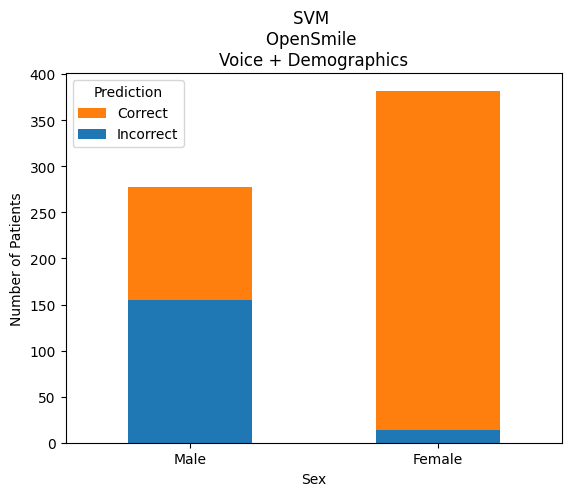

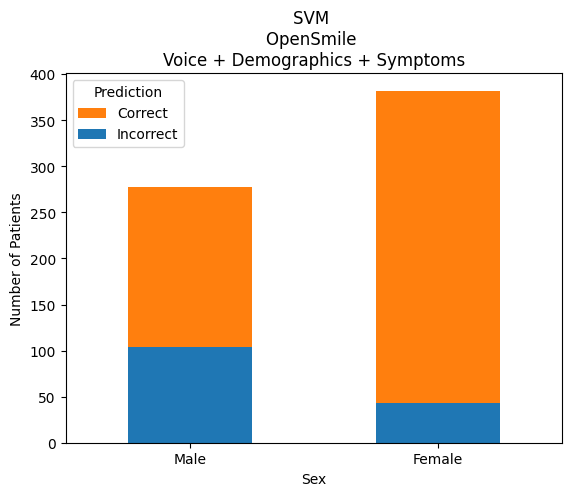

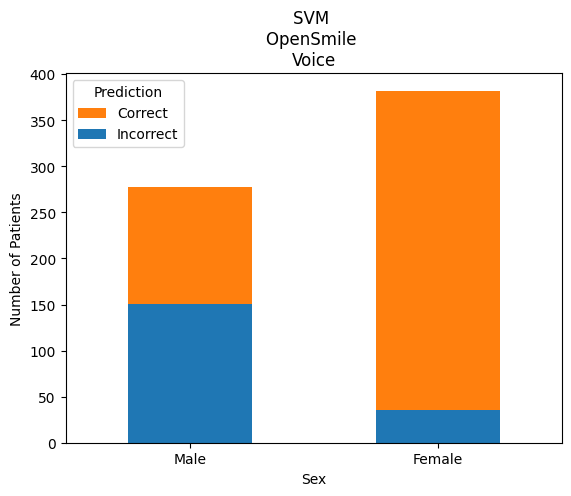

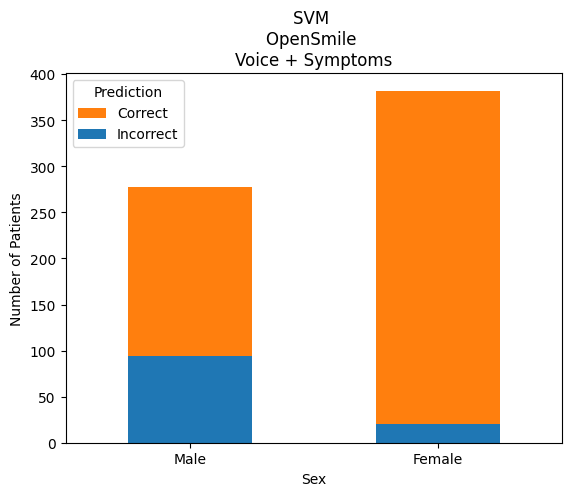

In [36]:
for col in prediction_columns:
    test_cross_tab = pd.crosstab(prediction_df['Sex'], prediction_df[col])

    test_cross_tab.rename(index={1:'Male'},inplace=True)
    test_cross_tab.rename(index={2:'Female'},inplace=True)
    
    test_cross_tab.rename(columns={True:'Correct'},inplace=True)
    test_cross_tab.rename(columns={False:'Incorrect'},inplace=True)


    test_cross_tab.plot(kind='bar', stacked=True)
    plt.xticks(rotation=0)
    plt.legend(title='Prediction', reverse=True)

    model_name = col.split(' ')[0]
    algorithm, feature, input_val = model_name.split('_', maxsplit=2)

    algorithm = algorithm_map[algorithm]

    try:
        input_val = input_map[input_val]
    except:
        pass
    
    title = f'{algorithm} \n{feature} \n{input_val}'
    plt.title(title)
    plt.ylabel('Number of Patients')

    #plt.savefig(f'GenderPerformance/{model_name}.pdf')

    plt.show()

        
        # break

# T Test Age

In [37]:
from scipy.stats import ttest_ind, mannwhitneyu, ks_2samp

In [41]:
age_results = pd.DataFrame(columns=['Model', 'T test', 'Mann Whitney', 'KS'])

In [42]:
for col in prediction_columns:
    model=col.split(' ')[0]
    correct_ages = list(prediction_df[prediction_df[col]==True]['Age'])
    incorrect_ages = list(prediction_df[prediction_df[col]==False]['Age'])

    t_stat, p_ttest = ttest_ind(correct_ages, incorrect_ages)
    u_stat, p_mannwhitney = mannwhitneyu(correct_ages, incorrect_ages)
    ks_stat, p_ks = ks_2samp(correct_ages, incorrect_ages)

    age_results.loc[len(age_results)] = [model, p_ttest, p_mannwhitney, p_ks]

In [43]:
age_results.head()

,Model,T test,Mann Whitney,KS
0,LR_FeatureStates_Age_Sex,2.790950e-18,1.780814e-17,1.845033e-16
1,LR_FeatureStates_Age_Sex_Symptoms,3.948451e-31,3.153156e-28,1.415991e-26
2,LR_FeatureStates_Rec_Only,2.973727e-12,2.236572e-12,1.551895e-12
3,LR_FeatureStates_Symptoms,7.769661e-10,4.153492e-10,1.568856e-09
4,LR_MFCC_Age_Sex,3.823221e-28,3.987315e-26,7.388467e-22


## Graphing

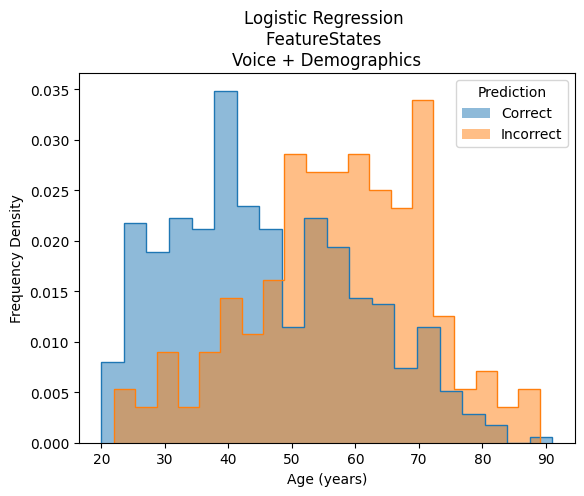

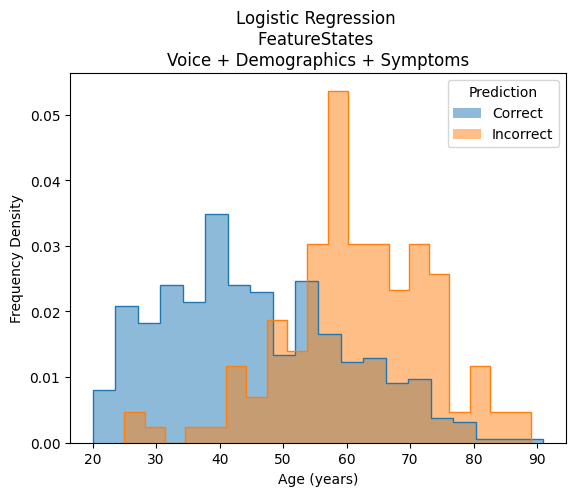

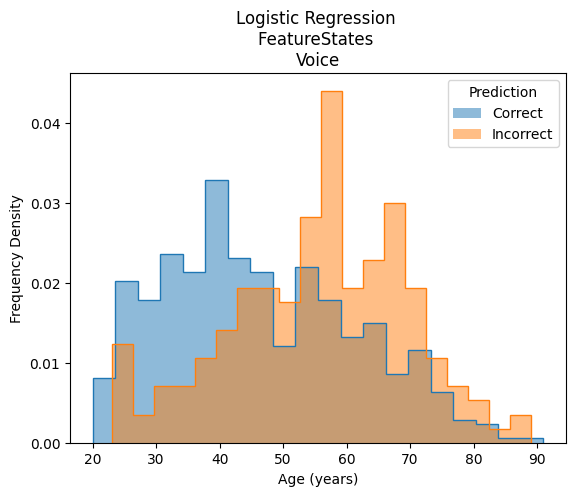

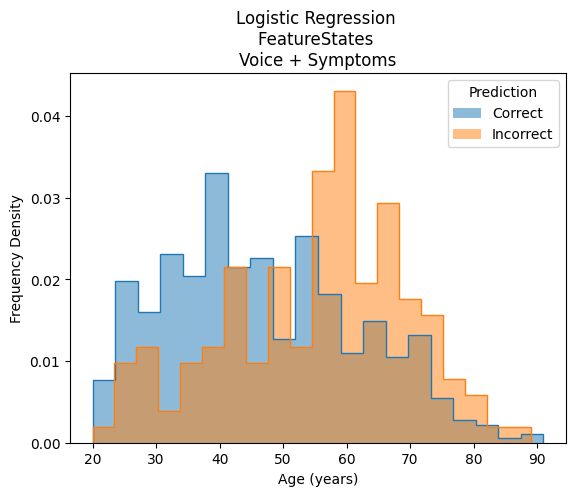

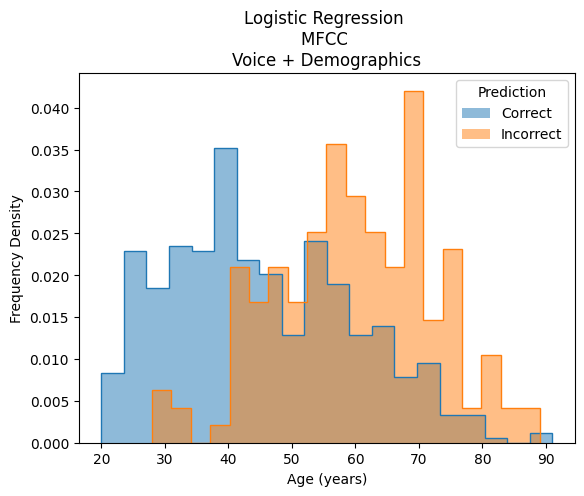

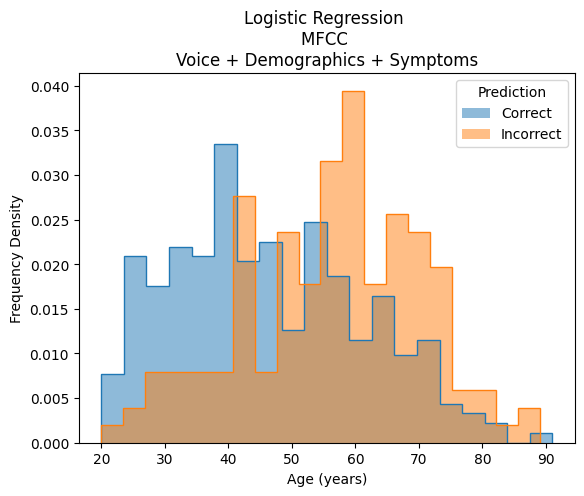

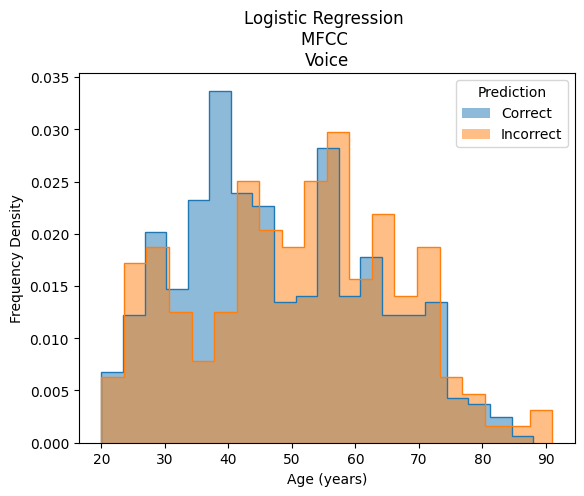

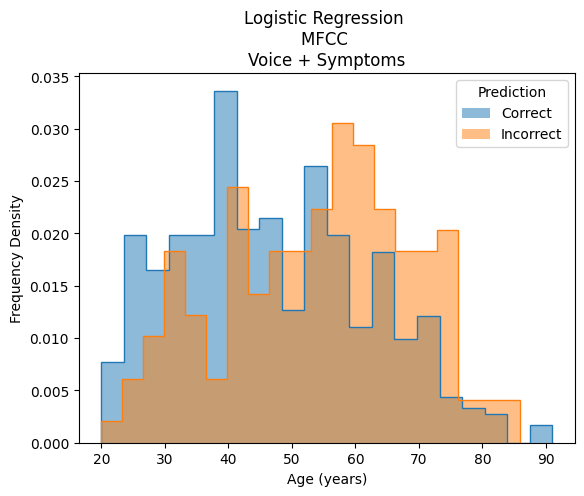

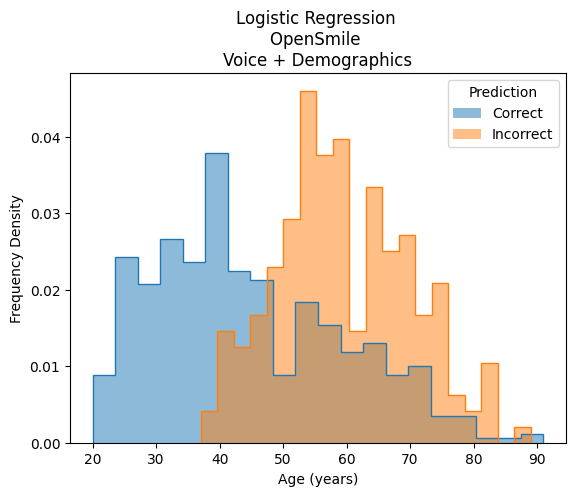

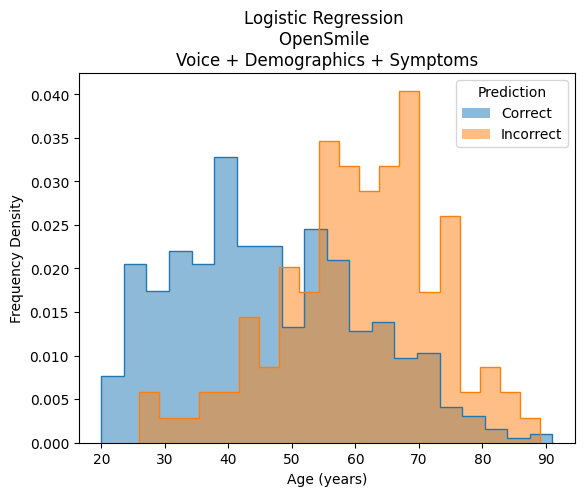

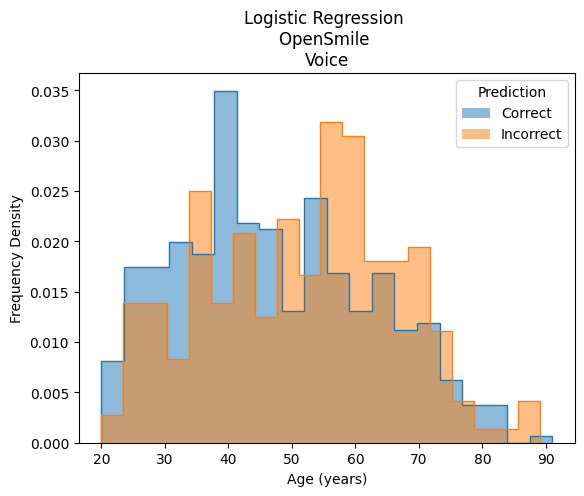

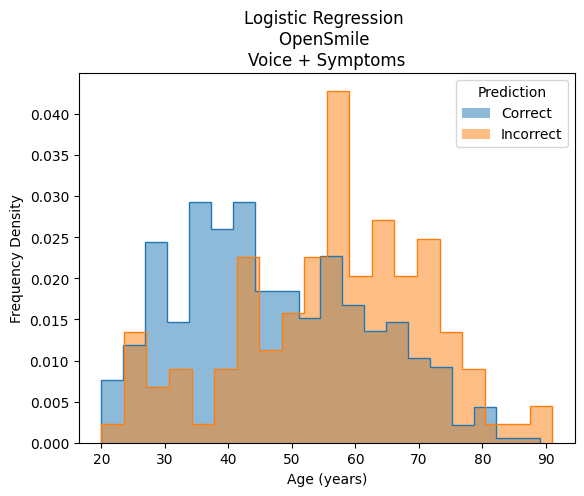

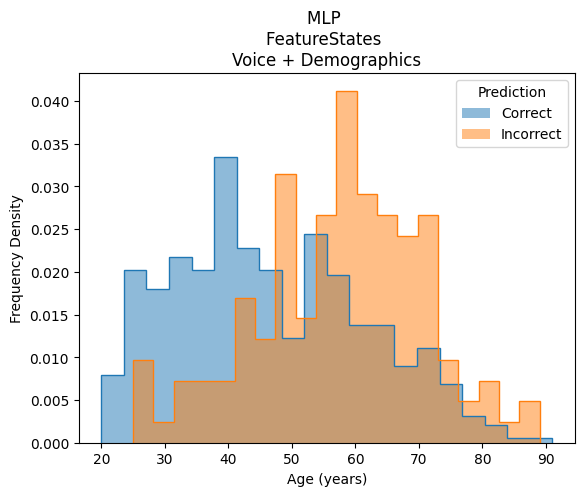

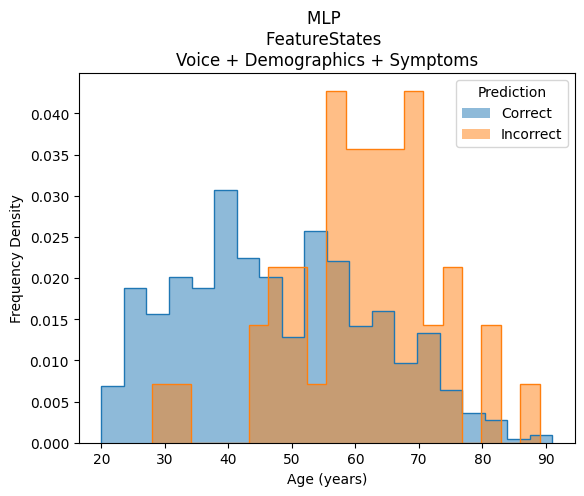

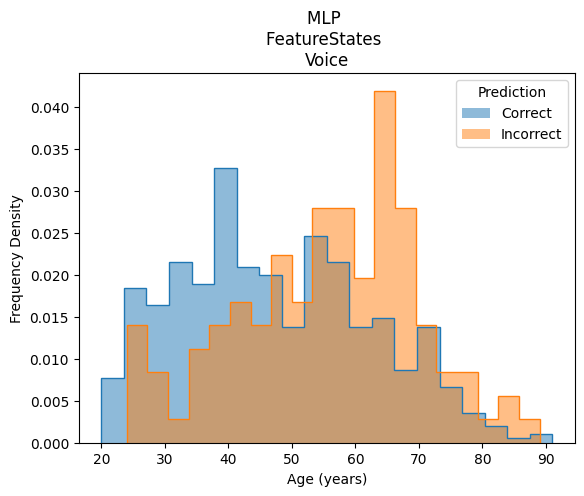

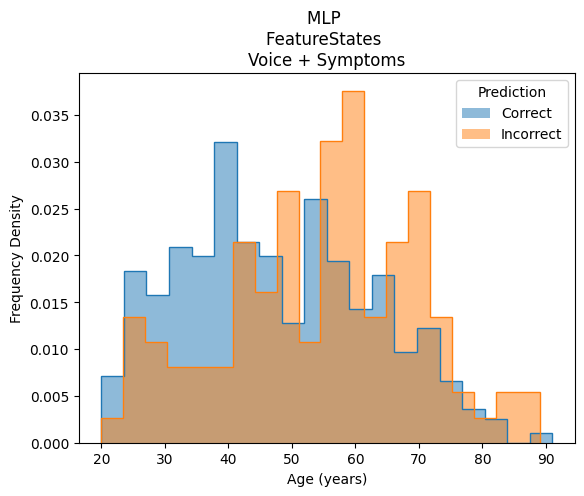

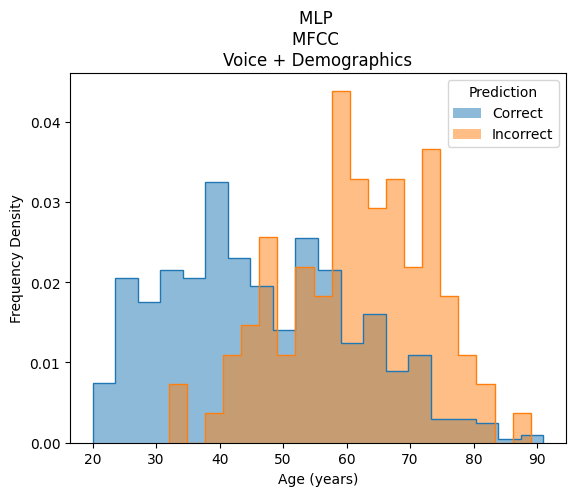

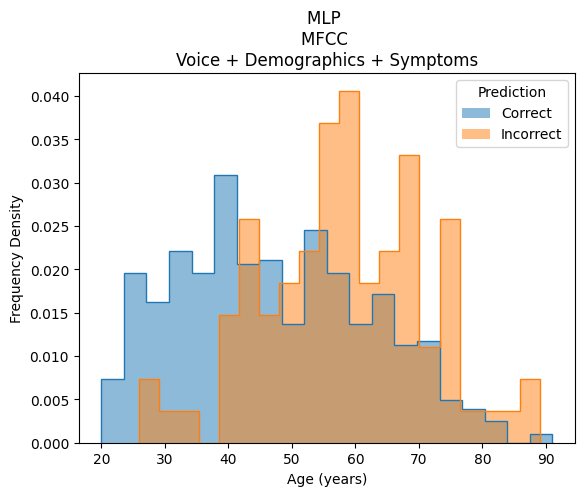

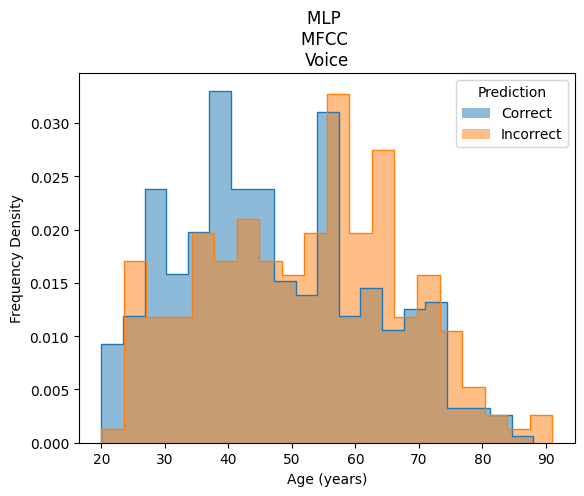

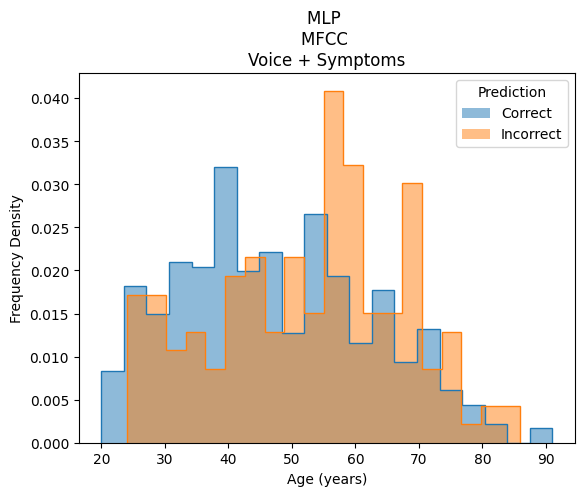

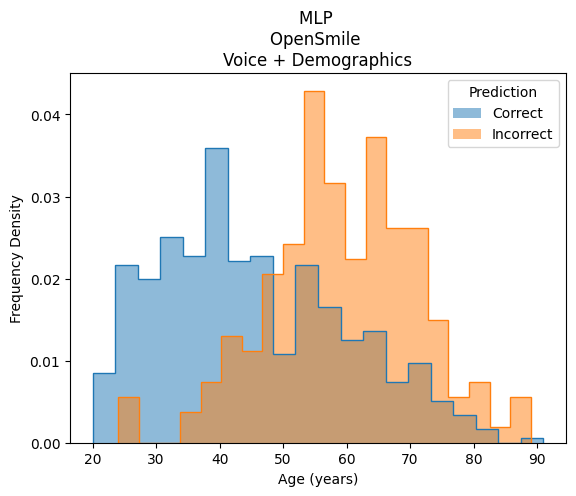

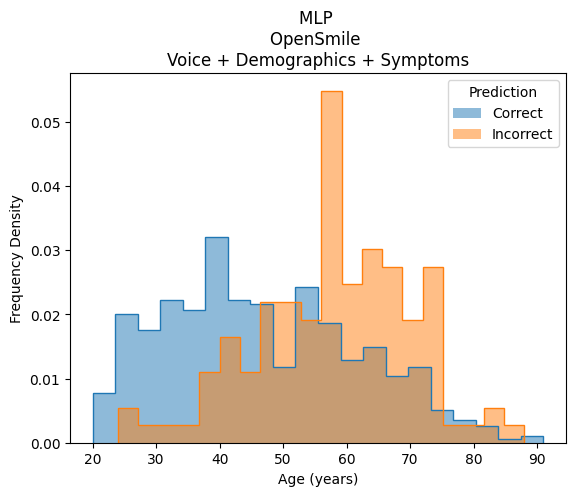

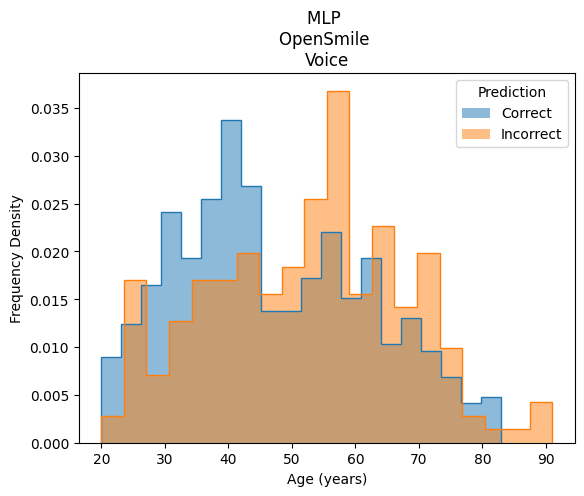

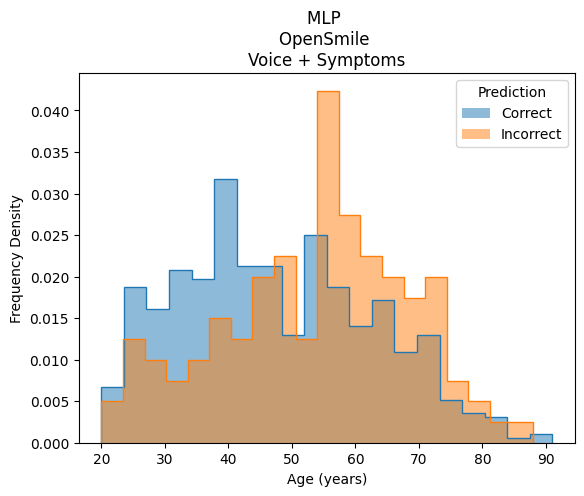

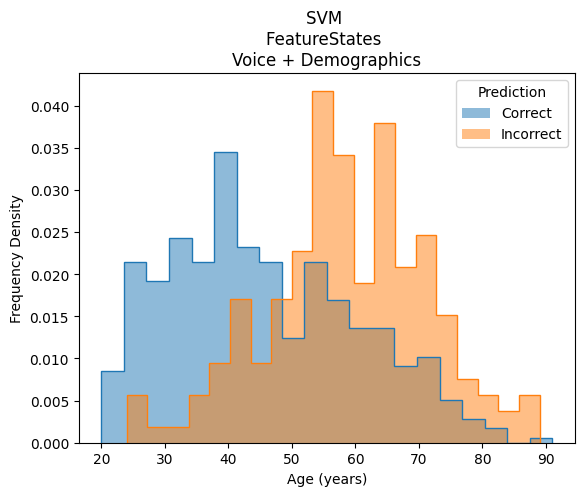

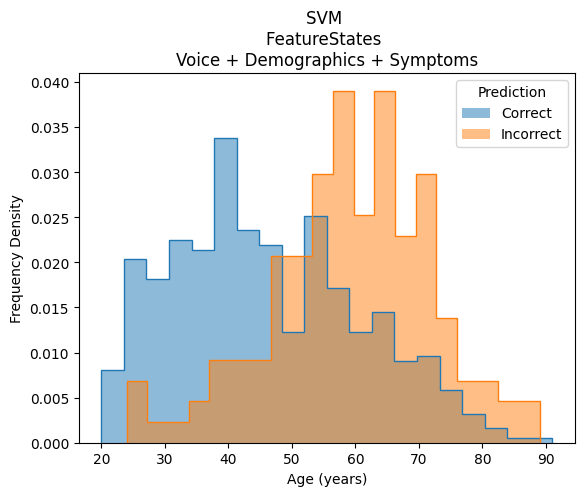

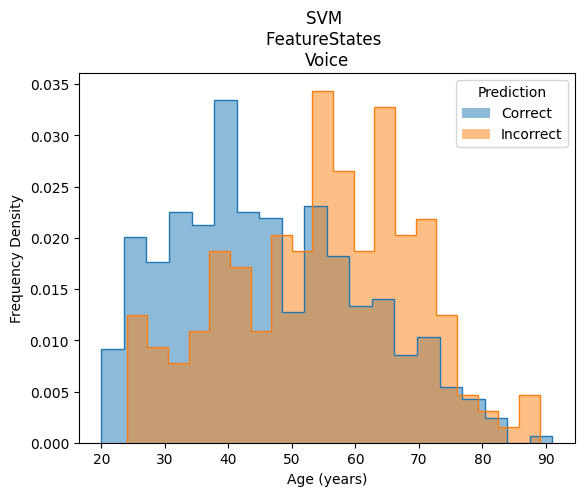

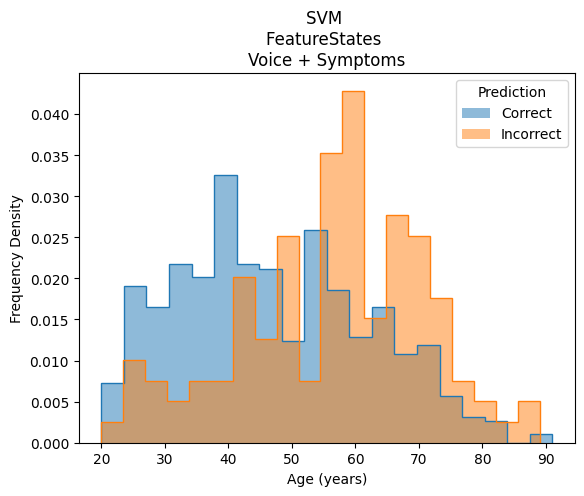

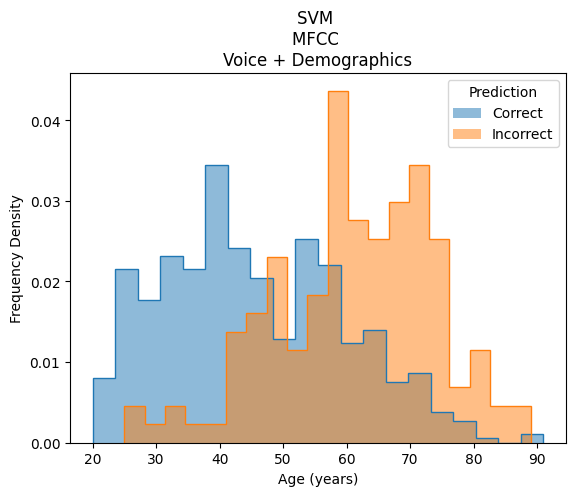

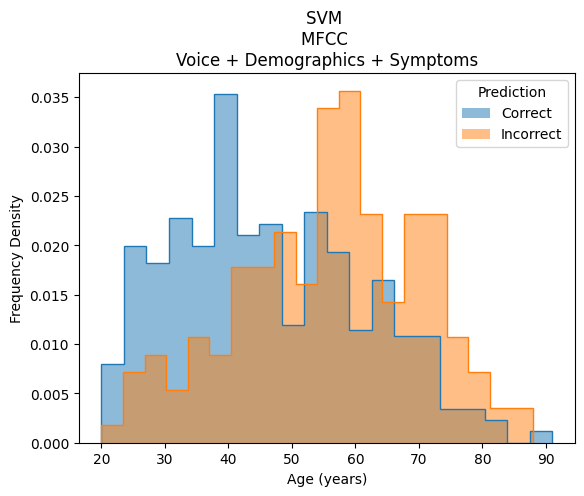

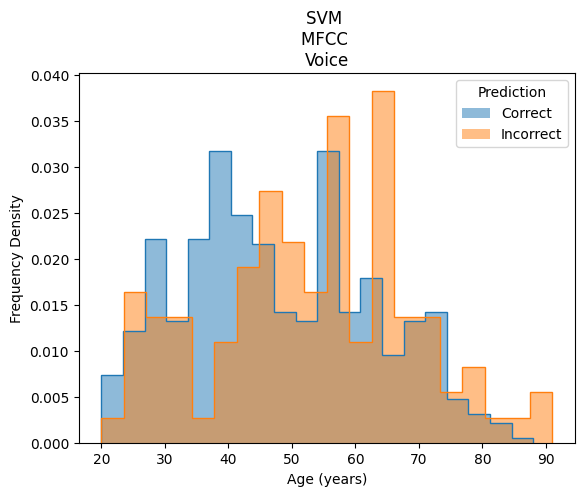

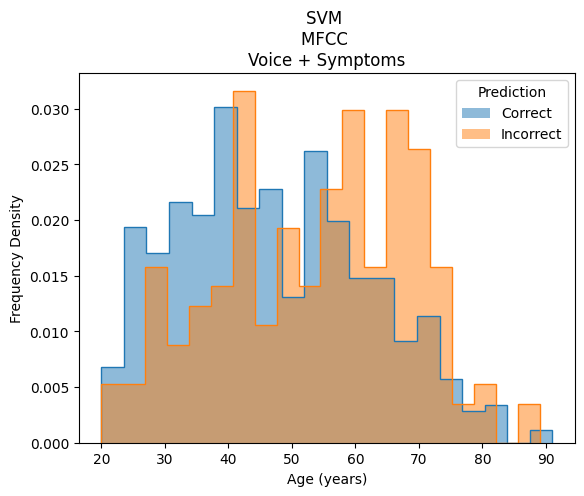

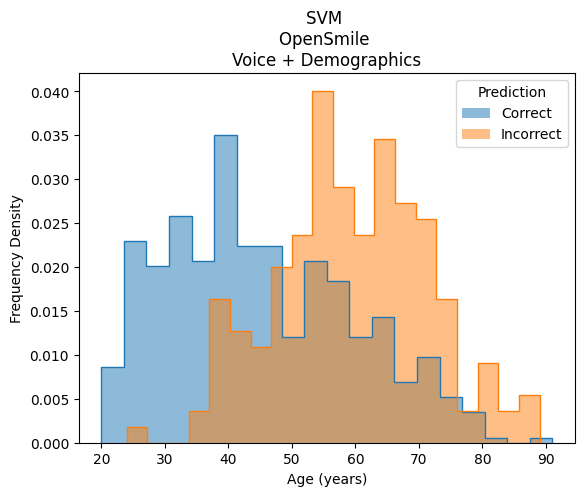

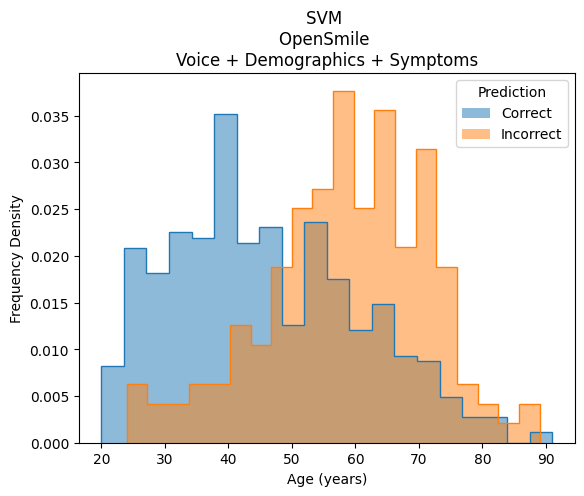

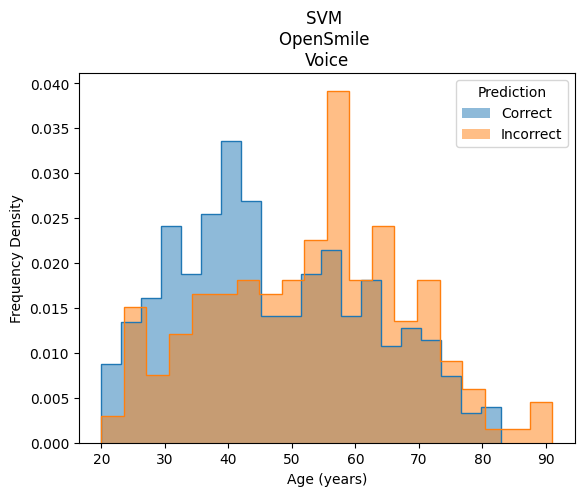

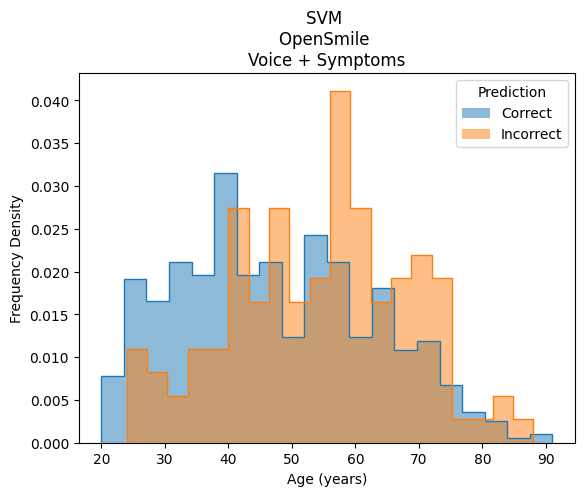

In [46]:
for col in prediction_columns:
    age_results = prediction_df[[col, 'Age']]

    age_results[age_results[col]==True]['Age'].plot(kind='hist', bins=20, label='Correct', density=True, alpha=0.5, color='tab:blue')
    age_results[age_results[col]==False]['Age'].plot(kind='hist', bins=20, label='Incorrect', density=True, alpha=0.5, color='tab:orange')
    
    age_results[age_results[col]==True]['Age'].plot(kind='hist', bins=20, histtype='step', color='tab:blue', density=True, label='')
    age_results[age_results[col]==False]['Age'].plot(kind='hist', bins=20, histtype='step', color='tab:orange', density=True, label='')
    
    plt.legend(title='Prediction')

    model_name = col.split(' ')[0]
    algorithm, feature, input_val = model_name.split('_', maxsplit=2)

    algorithm = algorithm_map[algorithm]

    try:
        input_val = input_map[input_val]
    except:
        pass
    
    title = f'{algorithm} \n{feature} \n{input_val}'
    plt.title(title)
    plt.ylabel('Frequency Density')
    plt.xlabel('Age (years)')

    #plt.savefig(f'AgePerformance/{model_name}.pdf')
    
    plt.show()